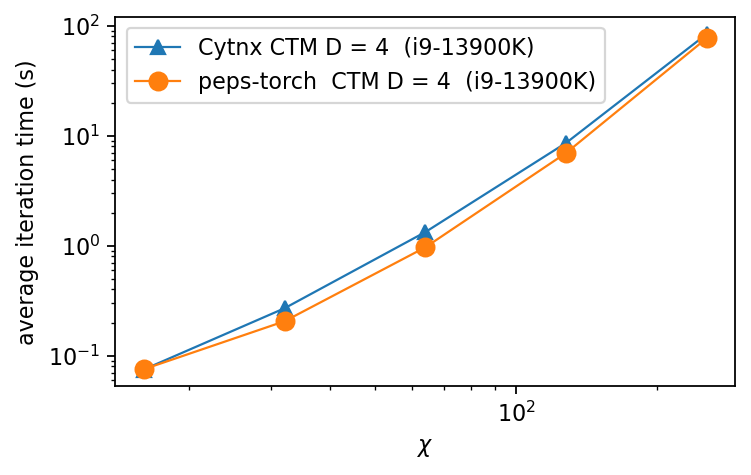

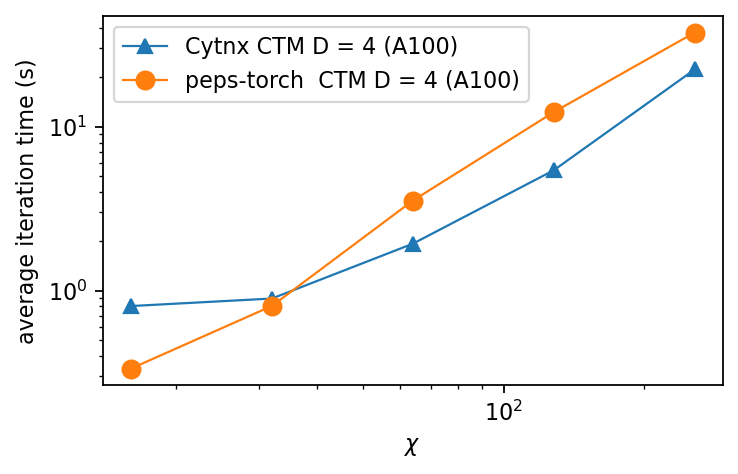

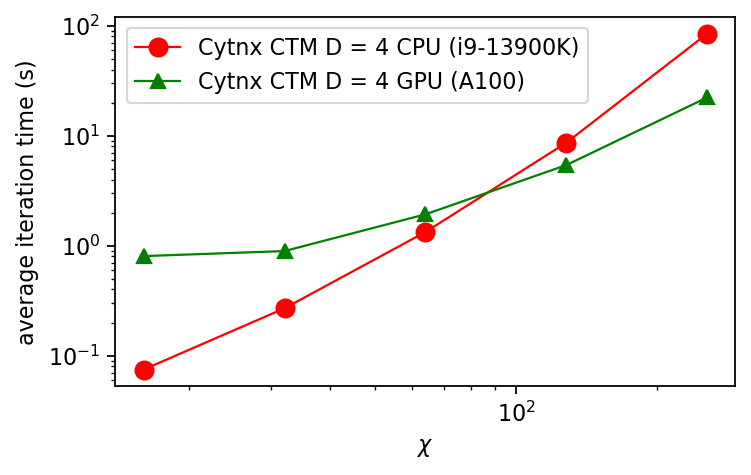

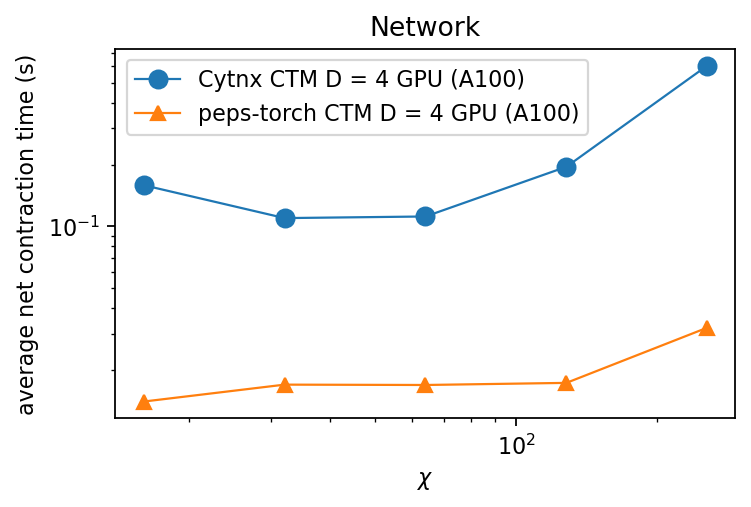

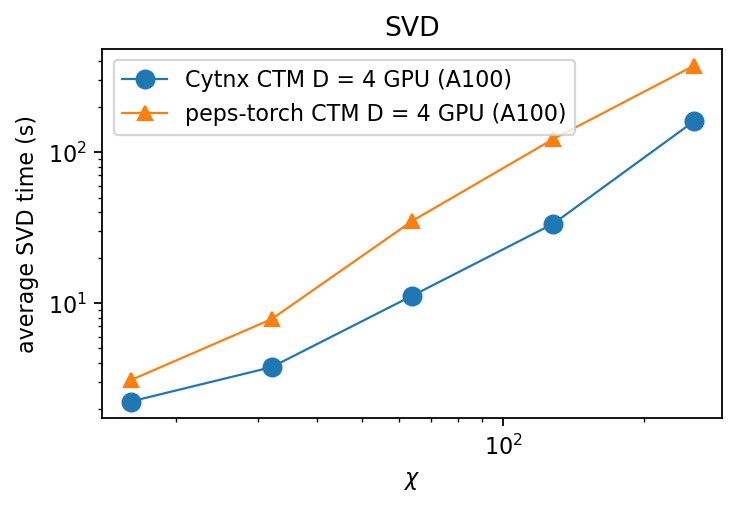

In [3]:
import matplotlib.pyplot as plt
import numpy as np
chi = [16,32,64,128,256]
chi_D2 = [16,32,64,128,256]

# complex128
# 16 cores i9-13900K GESDD
cytnx_net_D4 = [ 0.008732734248042107, 0.031560298753902316, 0.15051667322404683, 0.7821427793242037 , 3.814972263062373]
cytnx_svd_D4 = [ 0.46551974141038954, 1.375889599090442, 6.098515934543684, 47.41305050230585, 626.5911222842988]
cytnx_ctm_D4 = [ 0.7477654151152819 , 2.699970646062866 , 13.335222715279087 , 86.54623148380779, 850.6914146523923]

# Old data: Only 1 core i9-13900K
# cytnx_net_D4 = [ 0.002480572141706944, 0.06, 0.04, 0.24 , 1.30]
# cytnx_svd_D4 = [ 0.009480572141706944, 0.008, 0.53, 5.50, 47.50]
# cytnx_ctm_D4 = [ 0.85013613008894026 , 5.01 , 35.281761571997777 , 312.79, 2580.97]

# cytnx_net_D2 = [7.373280823230743e-058 ,0.00014453590847551823 ,0.00048653222620487213 ,0.0023731540422886615 , 0.015818132087588315   ]
# cytnx_ctm_D2 = [0.029253358719870448 ,0.07849376928061247 ,0.34478853712789714 , 1.9617679587099701 ,13.096749335993081 ]
# cytnx_ctm_D2_gpu = [0.029253358719870448 ,0.07849376928061247 ,0.34478853712789714 , 1.9617679587099701 ,11.896749335993081 ]

# 16 cores i9-13900K
torch_net_D4 = [0.014706872869282961, 0.026322939665988088, 0.10406613629311323, 0.6962173397187144, 3.309662642655894]
torch_svd_D4 = [0.5470463077072054, 1.3636528707575053, 5.471105991397053, 45.27526168618351, 614.5145428043325]
torch_ctm_D4 = [0.7518922553863376, 2.0567331060301512, 9.692388228839263, 70.12526156008244, 779.6991948238574]

# Old data: Only 1 core i9-13900K
# torch_net_D4 = [0.001, 0.006, 0.03, 0.24, 1.36]
# torch_svd_D4 = [0.009, 0.06, 0.51, 5.33, 45.72]
# torch_ctm_D4 = [0.70, 4.67, 34.49, 304.30, 2769.99]

# torch_net_D2 = [ 0.0006138780154287815, 0.0006959920283406973,  0.0007375609129667282, 0.0026979879476130016, 0.017176900058984756]
# torch_ctm_D2 = [0.050776669988408685, 0.09419820411130786, 0.3297925132792443, 1.8326073784846812, 12.534584653098136]


# only 1 core i9-13900K
# A100 SMX 80GB GESVD
cytnx_net_D4_gpu = [ 0.15873118200033787,  0.10982559199692332, 0.11183206300847814, 0.1950230449983792, 0.6054809569977806]
cytnx_svd_D4_gpu = [ 2.225395554996794,  3.7606525490045897, 11.195999076011503, 33.56297936199189, 160.5883085010064 ]
cytnx_ctm_D4_gpu = [ 8.046807425002044,  8.943373875004909, 19.310734612998203, 54.17726508999476, 223.24689668999417] # 256: 785s? 

# only 1 core i9-13900K
# A100 SMX 80GB
torch_net_D4_gpu = [ 0.014094262001890456,  0.017032331001246348, 0.016965916012850357, 0.01737073499316466, 0.03222527700199862]
torch_svd_D4_gpu = [ 3.0842939970025327,  7.8244419080074294, 35.05753264799205, 122.22654696799509, 374.4703903810041]
torch_ctm_D4_gpu = [ 3.344547006996436,  8.060010292007064, 35.37760716199773, 122.63065440898936, 374.91168627500156] #256 : 329s


fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
plt.plot(chi, np.asarray(cytnx_ctm_D4)/10, markersize = 6,marker = '^',lw = 1,label = 'Cytnx CTM D = 4  (i9-13900K)')
plt.plot(chi, np.asarray(torch_ctm_D4)/10, markersize = 8,marker = 'o',lw = 1,label = 'peps-torch  CTM D = 4  (i9-13900K)')
plt.ylabel("average iteration time (s)")
plt.xlabel(r'$\chi$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.show()


fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
plt.plot(chi, np.asarray(cytnx_ctm_D4_gpu)/10, markersize = 6,marker = '^',lw = 1,label = 'Cytnx CTM D = 4 (A100)')
plt.plot(chi, np.asarray(torch_ctm_D4_gpu)/10, markersize = 8,marker = 'o',lw = 1,label = 'peps-torch  CTM D = 4 (A100)')
plt.ylabel("average iteration time (s)")
plt.xlabel(r'$\chi$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
plt.plot(chi, np.asarray(cytnx_ctm_D4)/10, markersize = 8,marker = 'o',lw = 1,label = 'Cytnx CTM D = 4 CPU (i9-13900K)', color = 'red')
plt.plot(chi, np.asarray(cytnx_ctm_D4_gpu)/10, markersize = 6,marker = '^',lw = 1,label = 'Cytnx CTM D = 4 GPU (A100)', color = 'green')
plt.ylabel("average iteration time (s)")
plt.xlabel(r'$\chi$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.show()

# fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
# plt.plot(chi, np.asarray(torch_ctm_D4)/10, markersize = 8,marker = 'o',lw = 1,label = 'peps-torch CTM D = 4 CPU (i9-13900K)', color = 'red')
# plt.plot(chi, np.asarray(torch_ctm_D4_gpu)/10, markersize = 6,marker = '^',lw = 1,label = 'peps-torch CTM D = 4 GPU (A100)', color = 'green')
# plt.ylabel("average iteration time (s)")
# plt.xlabel(r'$\chi$')
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.legend()
# plt.show()

fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
plt.title("Network")
plt.plot(chi, cytnx_net_D4_gpu, markersize = 8,marker = 'o',lw = 1,label = 'Cytnx CTM D = 4 GPU (A100)')
plt.plot(chi, torch_net_D4_gpu, markersize = 6,marker = '^',lw = 1,label = 'peps-torch CTM D = 4 GPU (A100)')
plt.ylabel("average net contraction time (s)")
plt.xlabel(r'$\chi$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
plt.title("SVD")
plt.plot(chi, cytnx_svd_D4_gpu, markersize = 8,marker = 'o',lw = 1,label = 'Cytnx CTM D = 4 GPU (A100)')
plt.plot(chi, torch_svd_D4_gpu, markersize = 6,marker = '^',lw = 1,label = 'peps-torch CTM D = 4 GPU (A100)')
plt.ylabel("average SVD time (s)")
plt.xlabel(r'$\chi$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.show()